## Solution for Exercise 5 (Hopfield Network)

https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html

In [2]:
# start with importing the libraries we need

%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hopfield_network import pattern_tools, plot_tools, network

## Getting started

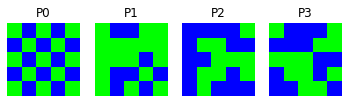

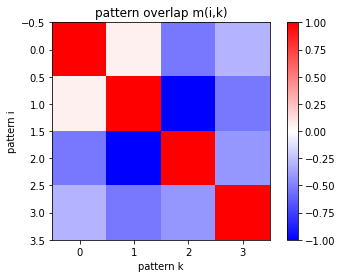

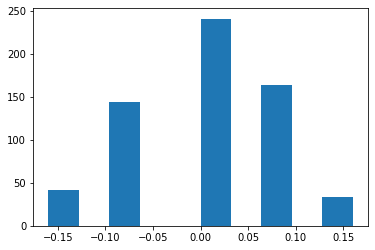

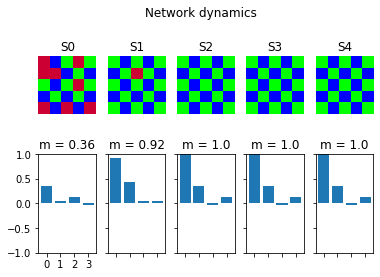

[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1.]


In [476]:
pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

plt.figure()
plt.hist(hopfield_net.weights.flatten(),10)



# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve. 
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


# plt.figure()
# plt.hist(hopfield_net.weights.flatten(), 20)

print(states[4])



## Single Pattern

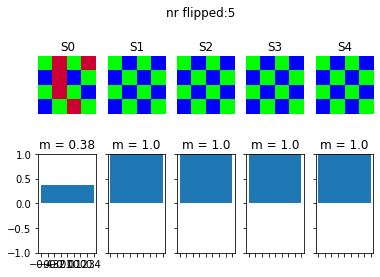

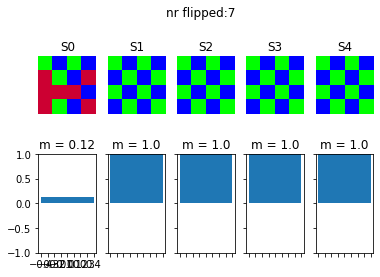

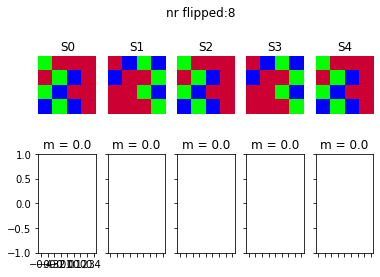

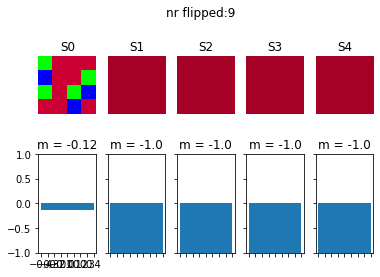

In [477]:
pattern_size = 4 # we choose that since 4**2 = 16 = N 
nr_flips = [5, 7, 8, 9]
# nr_flips = [8]


hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
checkerboard = factory.create_checkerboard()
hopfield_net.store_patterns([checkerboard])

for i in range(len(nr_flips)):
    noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=nr_flips[i])
    hopfield_net.set_state_from_pattern(noisy_init_state)
    states = hopfield_net.run_with_monitoring(nr_steps=4)
#     print(factory.reshape_patterns(states)[0])

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, [checkerboard], reference_idx=0, suptitle="nr flipped:{}".format(nr_flips[i]))



After running the Hopfield network, while we increase the number of flipped pixels, we observe that when we reach 8 pixels flipped then our network fails to retrieve the stored pattern and the same holds for more noisy patterns.

## Weight Matrix

The size of the network matrix is: (16, 16)  elements
The values that occur are:  [-0.0625  0.      0.0625]


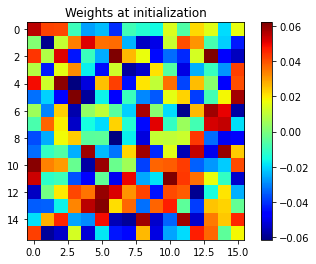

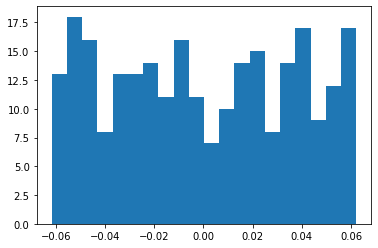

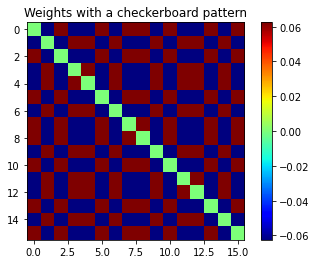

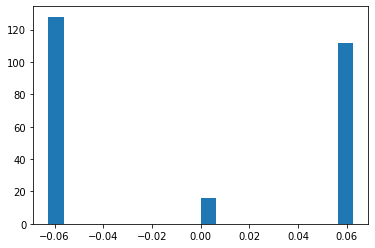

In [57]:
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
print("The size of the network matrix is:", hopfield_net.weights.shape, " elements")

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

# weights at the initialization
plot_tools.plot_network_weights(hopfield_net)
plt.title('Weights at initialization')
plt.figure()
plt.hist(hopfield_net.weights.flatten(),20)

# weights after storing a checkerboard pattern
checkerboard = factory.create_checkerboard()
hopfield_net.store_patterns([checkerboard])
plot_tools.plot_network_weights(hopfield_net)
plt.title('Weights with a checkerboard pattern')
print("The values that occur are: ", np.unique(hopfield_net.weights)) # this command return the values that appear but only once
plt.figure()
plt.hist(hopfield_net.weights.flatten(),20);

The values that occur are:  [-0.0625  0.      0.0625]


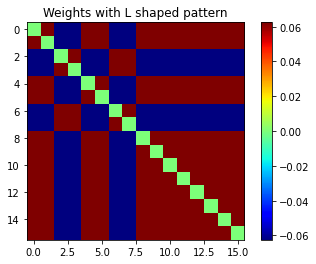

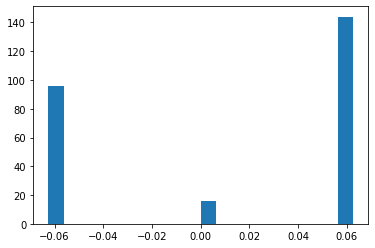

In [59]:
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# weights after storing an L shape pattern
l_shaped = factory.create_L_pattern(l_width = 2)
hopfield_net.store_patterns([l_shaped])
print("The values that occur are: ", np.unique(hopfield_net.weights)) # this command return the values that appear but only once
plot_tools.plot_network_weights(hopfield_net)
plt.title('Weights with L shaped pattern')
plt.figure()
plt.hist(hopfield_net.weights.flatten(),20);

The values that occur are:  [-0.125  0.     0.125]


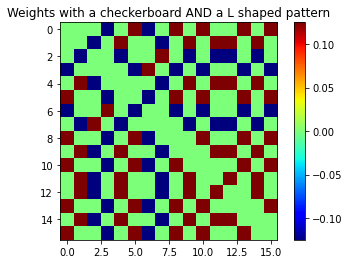

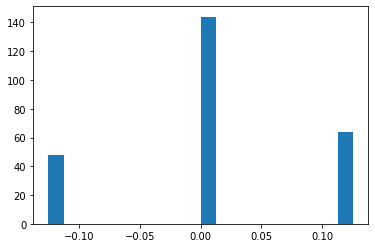

In [60]:
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# weights after storing a checkerboard and an L shape pattern
l_shaped = factory.create_L_pattern(l_width = 2)
checkerboard = factory.create_checkerboard()
hopfield_net.store_patterns([l_shaped, checkerboard])
print("The values that occur are: ", np.unique(hopfield_net.weights)) # this command return the values that appear but only once
plot_tools.plot_network_weights(hopfield_net)
plt.title('Weights with a checkerboard AND a L shaped pattern')
plt.figure()
plt.hist(hopfield_net.weights.flatten(),20);

We can notice that the values that occur in the last matrix are double the values that occur in the previous cases. Although the number of 0s have increase drastically.

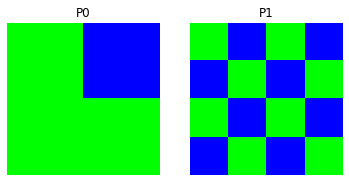

In [55]:
# here you can also see how the patterns look like 
plot_tools.plot_pattern_list([l_shaped, checkerboard])

## Capacity of an N=100 Hopfield-network

### 7.4.1
This means that when we experience something that is close enough to a memory that we already have, then neural dynamics transforms our current perception to an attractor state, i.e. the memory that we already had. 

Example: You see a house and if the appearance of the house is close enough with your house then you identify this house as your house.

We can store 14.0 patterns in our network of 100 neurons
Run 0


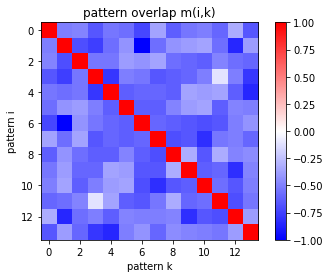

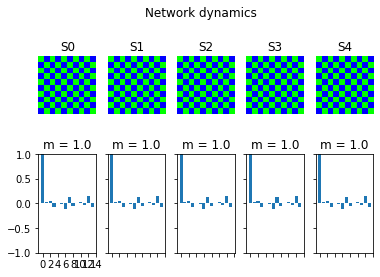

Run 1


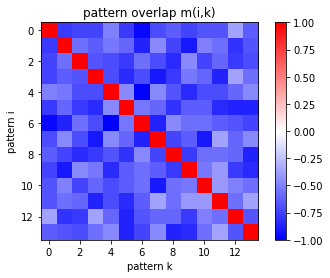

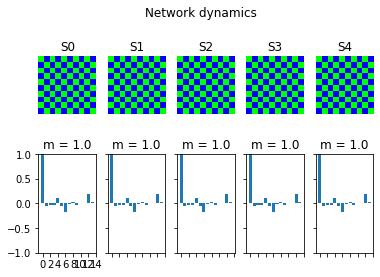

Run 2


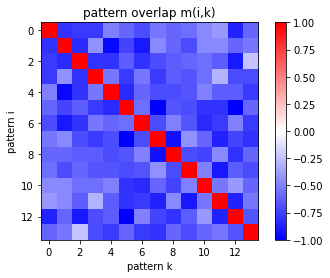

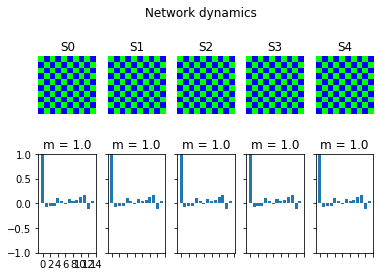

Run 3


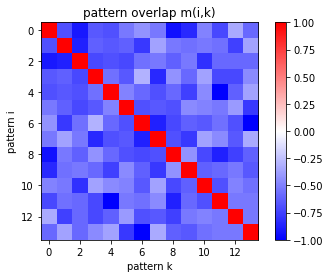

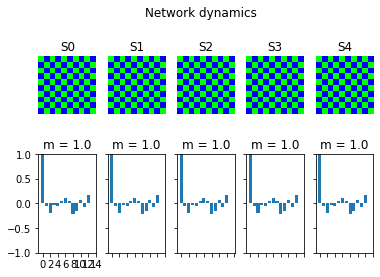

Run 4


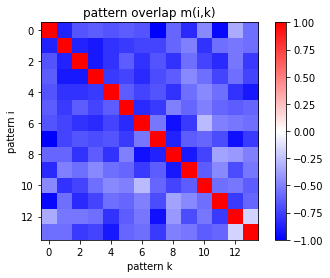

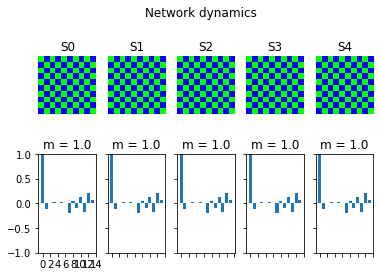

Run 5


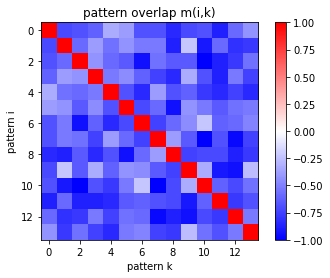

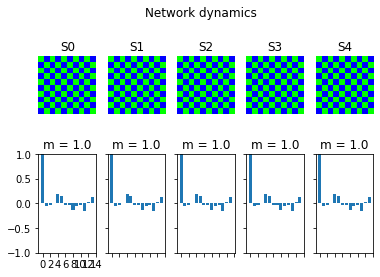

Run 6


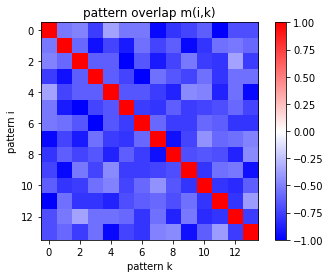

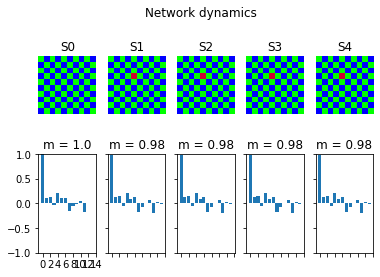

Run 7


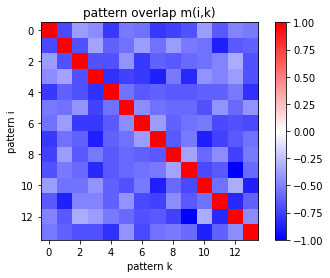

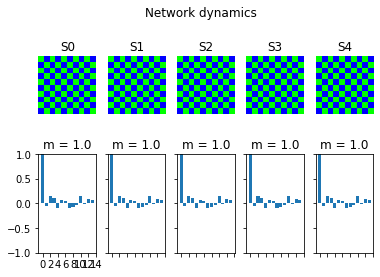

Run 8


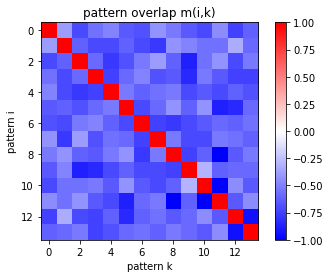

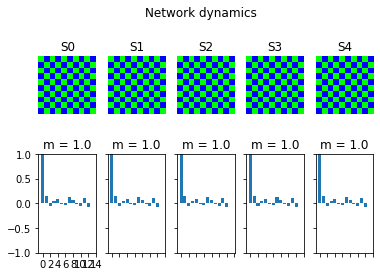

Run 9


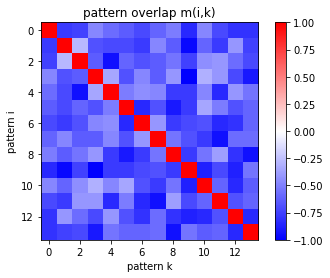

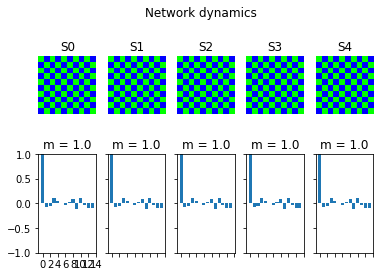

In [72]:
pattern_size = 10

capacity = int(pattern_size**2 * 0.14)
print("We can store {:.1f} patterns in our network of 100 neurons".format(capacity))

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

for i in range(10): # run the script some times
    print('Run {}'.format(i))
    # create a checkerboard pattern and add it to the pattern list
    checkerboard = factory.create_checkerboard()
    pattern_list = [checkerboard]
    # add random patterns to the list
    pattern_list.extend(factory.create_random_pattern_list(nr_patterns=capacity-1, on_probability=0.5))

    # how similar are the random patterns and the checkerboard? Check the overlaps
    overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
    plot_tools.plot_overlap_matrix(overlap_matrix)

    # let the hopfield network "learn" the patterns. Note: they are not stored
    # explicitly but only network weights are updated !
    hopfield_net.store_patterns(pattern_list)

    # initialize with orig pattern
    hopfield_net.set_state_from_pattern(checkerboard)
    # from this initial state, let the network dynamics evolve. 
    states = hopfield_net.run_with_monitoring(nr_steps=4)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")





After running the network several times, we observe that in the majority of times we successfully stay in the attractor state, as we are supposed to. However in sometimes we see that one pixel has flipped. 

## Non-random patterns
We use letters to exemplify correlated patterns
Note, the trajectory can go through a pattern without staying there. This is not a contradiction to the computation done in the class (book) where the overlap with a pattern is increasing because here we violate the assumption of zero overlap with other patterns. Furhtermore the decrease in energy is true only for the asynchronous update.

the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


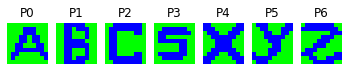

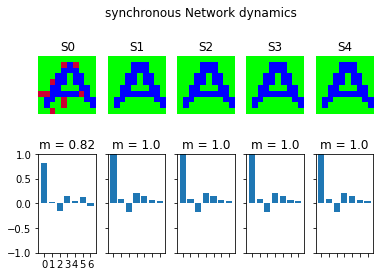

In [75]:

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# reproduce the same noise in the next run
# numpy.random.seed(67)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:    
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve. 
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="synchronous Network dynamics")


the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


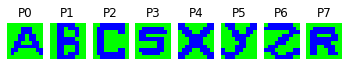

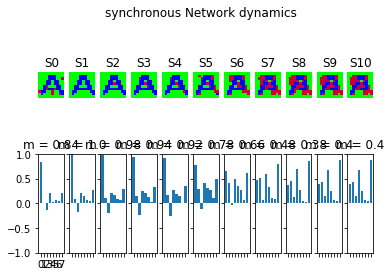

In [87]:
# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z', 'R']

# reproduce the same noise in the next run
# numpy.random.seed(67)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:    
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve. 
states = hopfield_net.run_with_monitoring(nr_steps=10)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="synchronous Network dynamics")


As we can see from the evolution of the network above, the letter 'A' is not anymore a fixed point, as after some steps that we evolve the network then it becomes very fast unstable and actually it starts to converge towards letter 'R'.

As we answered above, NO the overlap is not always decreasing as it converges to 'R' and then it stays stable.


the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


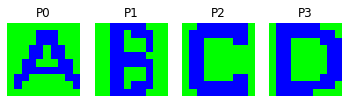

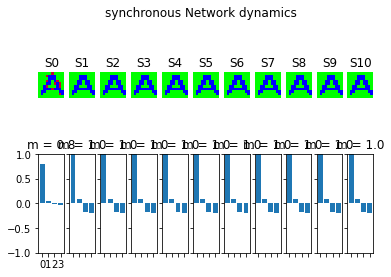

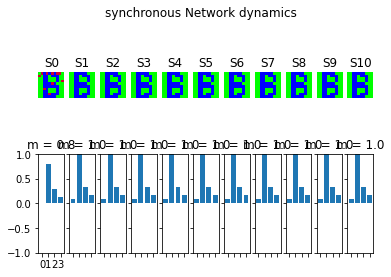

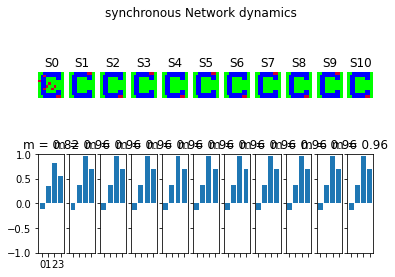

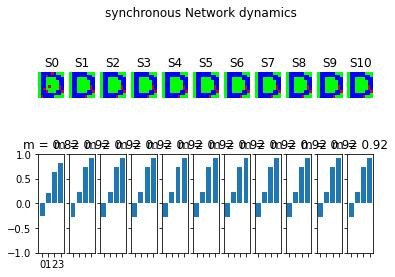

In [103]:
# 7.5.3

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C','D']

# reproduce the same noise in the next run
# numpy.random.seed(67)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:    
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

for reference_idx in range(len(pattern_list)):
    # # create a noisy version of a pattern and use that to initialize the network
    noisy_init_state = pattern_tools.get_noisy_copy(pattern_list[reference_idx], noise_level=0.2)
    hopfield_net.set_state_from_pattern(noisy_init_state)

    # from this initial state, let the network dynamics evolve. 
    states = hopfield_net.run_with_monitoring(nr_steps=10)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(
        states_as_patterns, pattern_list, reference_idx=reference_idx, suptitle="synchronous Network dynamics")


It is not trivial to make a guess regarding the number of letters that we can retrieve successfully. As we saw from the previous question(7.5.2) our network cannot retrieve successfully all the letter even with 8 patterns stored in the weights, which significantly smaller from the theoretical capacity (14 patterns). This is due to the fact that the higher the correlation of the patterns the harder it is for the network to discriminate between them.

Intuitive example: Sometimes it is difficult to discriminate monozygotic twins. However, if you become good friends or you see them more often, you could think as dedicating more neurons to them, you can finally discriminate between them.

## Bonus

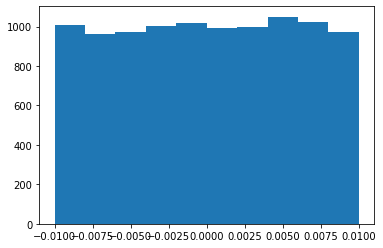

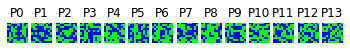

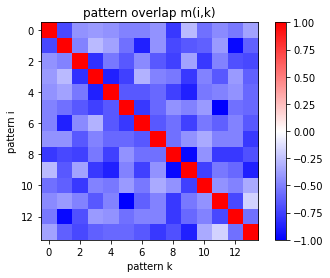

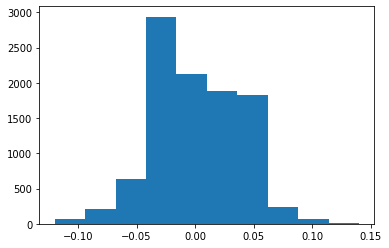

<Figure size 432x288 with 0 Axes>

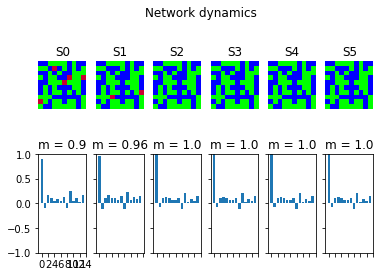

In [54]:
def my_bonus_update(state_s0, weights):
    random_neuron_idx_list = np.random.permutation(len(state_s0))
    state_s1 = state_s0.copy()
    for i in range(len(random_neuron_idx_list)):
        rand_neuron_i = random_neuron_idx_list[i]
        h_i = np.dot(weights[:, rand_neuron_i], state_s1)
        prop_state_s1_on = 0.5 * (1 + np.tanh(5*h_i)) # we consider temperature \beta = 5
        # the update here is probabilistic and in the next line we do the inference step
        state_s1[rand_neuron_i] = 1 if prop_state_s1_on > np.random.rand() else -1 
    return state_s1

pattern_size = 10
# np.random.seed(0)
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# here we update the update funcion 
hopfield_net.set_dynamics_to_user_function(my_bonus_update)
# from this point on we can do the same analysis we did before

plt.hist(hopfield_net.weights.flatten(),10)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

pattern_list = []
# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=14, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

plt.figure()
plt.hist(hopfield_net.weights.flatten(),10)


# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=5)
# hopfield_net.set_state_from_pattern(noisy_init_state)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve. 
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plt.figure()
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")